<a href="https://colab.research.google.com/github/chaeiJeon/PySnippetVault/blob/main/accuracyprecisionanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = [[ 3.6,  4.5,  5.8,  3.6,  0.1 ],
 [ 5.1,  4.1,  3.2,  4.1,  6.7 ],
 [ 2.0,  2.2,  1.4,  1.0,  1.4 ],
 [ 1.0,  0.2,  0.3,  0.2,  0.3 ],
 [ 7.2,  5.8,  7.6,  3.6,  3.5 ],
 [ 5.4,  5.1,  6.7,  5.0,  4.5 ],
 [ 8.1,  8.0,  8.2,  2.2,  3.6 ],
 [ 1.4,  1.2,  1.0,  4.1,  2.2 ],
 [ 1.4,  1.1,  1.1,  4.0,  2.2 ],
 [ 1.0,  2.0,  2.2,  2.0,  2.0 ],
 [ 1.3,  3.0,  1.8,  2.2,  3.0 ],
 [ 2.2,  2.2,  2.1,  5.8,  2.2 ],
 [ 1.0,  2.0,  1.0,  0.5,  0.4 ],
 [ 0.0,  0.0,  0.0,  0.2,  0.0 ],
 [ 2.2,  2.0,  1.0,  3.2,  2.8 ],
 [ 2.0,  1.0,  0.5,  0.0,  1.0 ],
 [ 0.0,  0.0,  0.6,  0.6,  0.0 ],
 [ 0.1,  9.1,  4.5,  3.2, 18.2 ],
 [ 2.2,  2.0,  8.2, 15.6, 11.2 ],
 [ 7.1,  2.0,  2.0,  2.2, 16.6 ],
 [ 2.0,  2.0,  4.1,  3.0, 17.9 ]]

In [91]:
def drawAccuracyPlot(data, title):
      plt.scatter(range(len(data)),data)
      plt.plot(data, 'o')
      plt.grid(True)
      plt.xlabel('Trial')
      plt.ylabel('Error Value')
      plt.ylim(0, 10)
      plt.title(title)
      plt.show()

In [92]:
def drawDensityPlot(data, title):
    sns.kdeplot(data, fill=True)
    plt.title(title);
    plt.xlabel('Error Value')
    plt.xlim(0, 10)

In [99]:
# 데이터 셋업
data_df = pd.DataFrame(data)

# 열별 평균 계산
mean_values = data_df.mean(axis=1)

# 오차 범위 정의
margin_of_error = 5

# 편차값
deviation_df = data_df.sub(mean_values, axis=0).abs()

# IQR 계산을 위한 Q1, Q3 계산
q1, q3 = np.percentile(deviation_df, [25, 75], axis=0)
iqr = q3 - q1

# 이상치 제거 범위 설정
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 제거
filtered_df = deviation_df[(deviation_df >= lower_bound) & (deviation_df <= upper_bound)]

# 1차원 배열로 변환 및 NaN 값 제거
flattened_array = filtered_df.values.flatten()
result_array = flattened_array[~np.isnan(flattened_array)]

# 정확도 계산
accuracy = round(np.mean(np.abs(result_array))*100,2)

# 정밀도 계산
precision = round(np.std(result_array)*100,2)

print(f'정확도: {accuracy}%\n정밀도: {precision}%')

정확도: 94.79%
정밀도: 97.47%


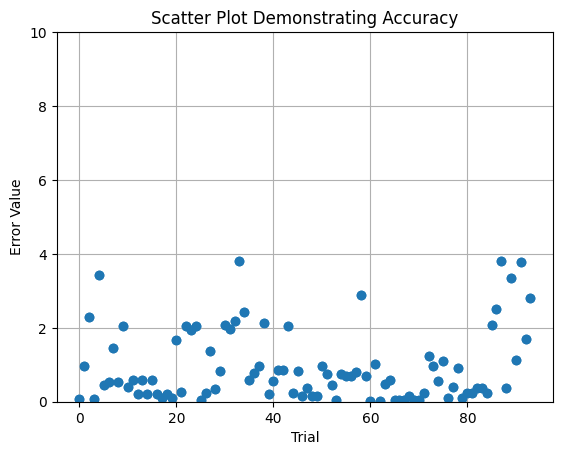

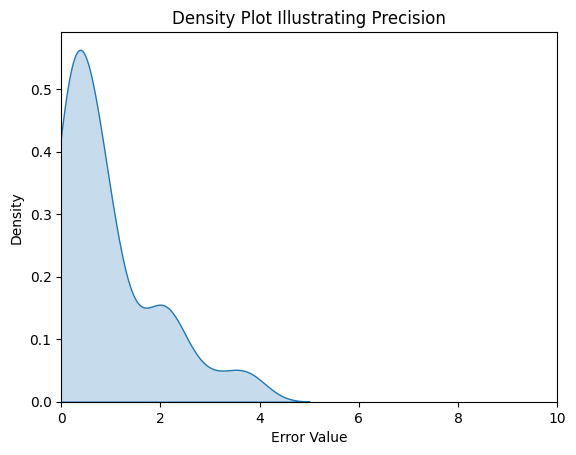

In [94]:
# 점 그래프 그리기
drawAccuracyPlot(result_array, 'Scatter Plot Demonstrating Accuracy')
drawDensityPlot(result_array, 'Density Plot Illustrating Precision')